# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We solve the model by scipy-optimization.

First, we define the relevant variables. 

Second, we define our utility function and budget constraint as functions. The utility function returns the utility from the given inputs - this is what we want to optimize. The budget-constraint returns the budget given the values herein. 

Third, we define a decision-function, returning the utility, given our knowledge, that consumption equals the budget.

Fourth, we define our optimization-function. Here, we optimize the decision-function for labor, given all the other values. This returns the optimal labor, which enables us to calculate the consumption and utility of the consumer. 

In [2]:
#Defining variables:
m=1 #money
v=10 #v
e=0.3 #frisch
tau_0=0.4 #ltax
tau_1=0.1 #ttax
kappa=0.4 #cutoff
w=0.5
params=[tau_1,tau_0, kappa]
# Defining utility function and budget constraint:
def utility(l,c,e,v):
    # Returning utility from labour supply and consumption
    u=np.log(c)-v*l**(1+1/e)/(1+1/e)
    return u

def budget_constraint(m,w,l,params):
    # Returning total resources in terms of wage less taxes and cash
    budget=m+w*l-w*l*tau_0-tau_1*max((w*l-kappa),0)
    return budget

# Defining a function, setting consumption equal to budget (as we know, the consumer chooses to spend entire budget.),
# Making this function return the utility, while c = m (negatively, as scipy only can minimize).
# This is what we want to optimize.
def decision(l,w,e,v,params):
    c=budget_constraint(m,w,l,params)
    return -utility(l,c,e,v)

# Defining the optimizer-function, optimizing the consumer's decision function for l, given all other values in decision.
def optimizer(w,e,v,params,m):
    # Call the solver
    sol_case1 = optimize.minimize_scalar(
        decision,method='bounded',
        bounds=(0,1),args=(w,e,v,params))

    # Making the optimizer-function create a list of the three solution-values, l, c, and u.
    # Optimal labor equals the optimized solution in the function:
    lstar = sol_case1.x

    # Optimal consumption equals the budget constraint-function as we know, given the optimal l.
    cstar = budget_constraint(m,w,lstar,params)

    # Optimal utility must then be equal to the utility function given optimal l and c.
    ustar = utility(lstar,cstar,e,v)
    return [lstar,cstar,ustar]

# Draws out variables from the optimizer-list.
lstar = optimizer(w,e,v,params,m)[0]
cstar = optimizer(w,e,v,params,m)[1]
ustar = optimizer(w,e,v,params,m)[2]

def printsolution(w,e,v,params,m):
    print(f'Labour supply: {lstar:.3f}')
    print(f'Consumption: {cstar:.3f}')
    print(f'Utility: {ustar:.3f}')

printsolution(w,e,v,params,m)


Labour supply: 0.339
Consumption: 1.102
Utility: 0.076


# Question 2

ADD ANSWER.

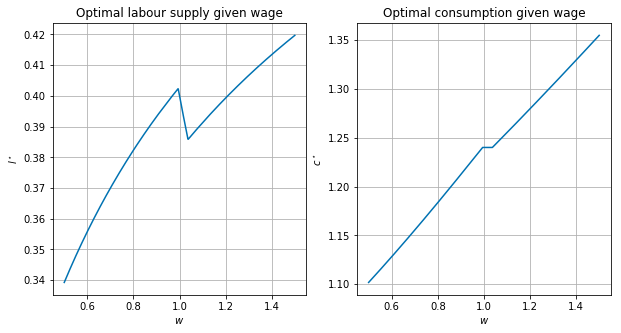

In [4]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

N=1000
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimizer(w,e,v,params,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

# a. create a figure
fig = plt.figure(figsize=(10,5))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show()

# Question 3

In this problem we generate a sequence of 10000 random numbers from a uniform distribution to represent the individual wages of the 10000 people in the population. These numbers are saved to a list. We then create a for loop which appends the optimal amount of labour for each individual consumer given their wage and saves these to a list.
Lastly, we use a lambda function to compute the tax revenue given the parameters and the lists of wages and labour respectively. 

In [19]:
#Creating the wage list based on a uniform distribution
N=10000
np.random.seed(1986)
wi_vec=np.random.uniform(0.5,1.5,size=N)

#Adding empty lists to append to
l_vec=np.empty(N)
c_vec=np.empty(N)

#Loop appending the optimal amount of labour to a new list
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,params,m)
    l_vec[i]=bundle[0]

#Lambda function calculation the tax revenue based on the two lists containing wages and optimal amounts of labour respectiely. 
tax_rev=lambda l_vec,wi_vec: tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0)
tax=tax_rev(l_vec,wi_vec)

print(np.sum(tax))


3196.6947029870807


# Question 4

This problem is entirely 

In [18]:
e=0.1
N=10000
np.random.seed(1986)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,params,m)
    l_vec[i]=bundle[0]


tax_rev=lambda l_vec,wi_vec: tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0)
tax=tax_rev(l_vec,wi_vec)

print(np.sum(tax))

3196.6947029870807


# Question 5

Here, we find the tax rates and tax cutoff, such that we maximize tax revenue given the consumer behavior. 

In [11]:
#Optimerer mht. tau_0:
def taxrev(tau_0,tau_1,wi_vec,l_vec,kappa):
    
    tax = np.sum(tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0))
    return -tax

def taxopt(wi_vec,tau_1,l_vec,kappa):
    tauopt = optimize.minimize_scalar(
        taxrev,method='bounded',
        bounds=(0,1),args=(tau_1,wi_vec,l_vec,kappa))
    løs = tauopt.x
    return løs

taxopt(tau_1,wi_vec,l_vec,kappa)


0.9999940391390134

# Conclusion

We solved the consumer problem, yielding the optimal labour and consumption maximizing utility of the agent. 
Next, we calculated the expected tax revenue given the consumer preferences.


In [71]:
#NY OPTIMERING I OPGAVE 5:
def taxrev(params,wi_vec,l_vec):
    tax = np.sum(tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0))
    return -tax

initial=[0.5,0.5,1000]


def taxopt(wi_vec,l_vec,params):
    tauopt = optimize.minimize(
        taxrev(params,l_vec,wi_vec),initial, method='SLSQP',
        bounds=[(0,1),(0,1),(0,None)])
    løs = tauopt.x
    return løs

taxopt(wi_vec,l_vec,params)

TypeError: 'numpy.float64' object is not callable